# 1. Web scraping comments

Tutorial: https://github.com/egbertbouman/youtube-comment-downloader

In [31]:
# Import libraries
import itertools 
from youtube_comment_downloader import * #you can find out more about this library here Tutorial: https://github.com/egbertbouman/youtube-comment-downloader
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#NLP packages
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import nltk

In [32]:
# Testing to download comments from link
downloader = YoutubeCommentDownloader()
comments = downloader.get_comments_from_url('https://www.youtube.com/watch?v=IAZVfY3bfbk', sort_by=SORT_BY_POPULAR)
# This is the video with the highest polarity (most positive comments) based on the top 50 comments in the youtube

# empty data frame
comment_df = pd.DataFrame()

# show first 10 comments by getting the first 10th items from generator object
comments_top10 = itertools.islice(comments, 10)

# convert generator object to pd.dataframe
comments_top10df= pd.DataFrame(comments_top10)


In [33]:
# To count number of comments for this video 
#def ilen(it):
#    return len(list(it))

#ilen(comments)

In [34]:
comments_top10df

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed
0,Ugy2LLSC4MvOa-G8tMV4AaABAg,We’re so lucky to get multiple videos with bot...,1 month ago,@McOwenWilson,UCUpx289zCm904N5HkLyvnmA,105,https://yt3.ggpht.com/ytc/AOPolaQvwiPmroQRTAqQ...,True,False,1.689634e+09
1,UgxYCkRG9mtYGhBKgE54AaABAg,I love this Collab! Thank you all for allowing...,1 month ago,@bbk2325,UCCpWizuBPp4x38iW77E-2cA,75,https://yt3.ggpht.com/ySqE9Yd5HQGhYwMmko_-ub-V...,True,False,1.689634e+09
2,Ugxn2WLmf53--d4piCl4AaABAg,"The colab I’ve always wanted. 2 of the nicest,...",1 month ago (edited),@robroaring7175,UC1ySaQ7VOXOskQjnzT0xM_w,92,https://yt3.ggpht.com/cFR_WQ1y3FK84XIv7DCV1pYV...,True,False,1.689634e+09
3,Ugy4f3Zgwt8Ofpu7yT14AaABAg,Experiencing these two channels collaborate si...,1 month ago,@user-kz1ve6zd5y,UCwaPuchHycbyUzdvvRPknpw,26,https://yt3.ggpht.com/lluaWC70VzGkBt3Olt20F2l8...,True,False,1.689634e+09
4,Ugx--c4qBowKPV6Hyb54AaABAg,You and Rokkit kit are both people I wouldn't ...,1 month ago,@spurlock2679,UCubAmk6J2qgdWZeyIHyW8sQ,16,https://yt3.ggpht.com/PjQmPKyTLByPd2dCXPk5_RuF...,False,False,1.689634e+09
5,UgxRqarwBnAiBo7iD0Z4AaABAg,I love the drone shots at the start. Such beau...,1 month ago,@jouxjia,UCdQ9RSX8eFGriLkwwEjqrRg,4,https://yt3.ggpht.com/PEzY1W2cjyC0h4POsr2Cpemy...,False,False,1.689634e+09
6,UgxVchs9d5ZG7bDyue94AaABAg,My two favorite YouTube channels together. Thi...,1 month ago,@johnanglin9577,UCCLThnQUgRUitrbPtPXYt0w,22,https://yt3.ggpht.com/ytc/AOPolaQ1vSW3jbrZCb3A...,True,False,1.689634e+09
7,Ugx3j-jZk0HbzRy_IO54AaABAg,Glad my Australian home country has treated yo...,1 month ago,@ashleighcleaver9009,UC1PNvji858kCCD3kADmCjlw,31,https://yt3.ggpht.com/phanTF0D0L0JR2TTgG_RUtMt...,True,False,1.689634e+09
8,Ugybzf3xNNSc2jOVPy94AaABAg,This collab made me so happy - looked like a b...,1 month ago (edited),@Adrianmarcramos,UC2w8gZNfe93Mhvd4HRb0K8w,2,https://yt3.ggpht.com/ytc/AOPolaQKUiGE32BjT_Ao...,False,False,1.689634e+09
9,UgyWJNpgSw8mZ6izuGp4AaABAg,"Wow, this is the colab I never knew I needed. ...",1 month ago,@jaxxic,UCNNjKqnxidCWp8l_rV_jtXA,3,https://yt3.ggpht.com/ytc/AOPolaSGpUYw1ND96FTp...,False,False,1.689634e+09


In [35]:
# Look at the first 500 comments
comments = downloader.get_comments_from_url('https://www.youtube.com/watch?v=IAZVfY3bfbk', sort_by=SORT_BY_POPULAR)

comments_top500 = itertools.islice(comments, 500)
comments_top500df= pd.DataFrame(comments_top500)

In [36]:
comments_top500df.head()

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed
0,Ugy2LLSC4MvOa-G8tMV4AaABAg,We’re so lucky to get multiple videos with bot...,1 month ago,@McOwenWilson,UCUpx289zCm904N5HkLyvnmA,105,https://yt3.ggpht.com/ytc/AOPolaQvwiPmroQRTAqQ...,True,False,1.689634e+09
1,UgxYCkRG9mtYGhBKgE54AaABAg,I love this Collab! Thank you all for allowing...,1 month ago,@bbk2325,UCCpWizuBPp4x38iW77E-2cA,75,https://yt3.ggpht.com/ySqE9Yd5HQGhYwMmko_-ub-V...,True,False,1.689634e+09
2,Ugxn2WLmf53--d4piCl4AaABAg,"The colab I’ve always wanted. 2 of the nicest,...",1 month ago (edited),@robroaring7175,UC1ySaQ7VOXOskQjnzT0xM_w,92,https://yt3.ggpht.com/cFR_WQ1y3FK84XIv7DCV1pYV...,True,False,1.689634e+09
3,Ugy4f3Zgwt8Ofpu7yT14AaABAg,Experiencing these two channels collaborate si...,1 month ago,@user-kz1ve6zd5y,UCwaPuchHycbyUzdvvRPknpw,26,https://yt3.ggpht.com/lluaWC70VzGkBt3Olt20F2l8...,True,False,1.689634e+09
4,Ugx--c4qBowKPV6Hyb54AaABAg,You and Rokkit kit are both people I wouldn't ...,1 month ago,@spurlock2679,UCubAmk6J2qgdWZeyIHyW8sQ,16,https://yt3.ggpht.com/PjQmPKyTLByPd2dCXPk5_RuF...,False,False,1.689634e+09


In [37]:
# Save comments to CSV file 
comments_top500df.to_csv("02_Results/best_IDIAZVfY3bfbk_ytb500.csv")

In [38]:
# To directly read the data saved
# comments_top500df = pd.read_csv("02_Results/best_IDIAZVfY3bfbk_ytb500.csv")

# 2. Clean data 
Tutorial: https://towardsdatascience.com/cleaning-preprocessing-text-data-for-sentiment-analysis-382a41f150d6

In [39]:
# we will remove punctuation:
comments_top500df['text'] = comments_top500df['text'].str.replace('[^\w\s]','')
comments_top500df['text'].head()

C:\Users\Amanda\AppData\Local\Temp\ipykernel_43268\1654617036.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  comments_top500df['text'] = comments_top500df['text'].str.replace('[^\w\s]','')


0    Were so lucky to get multiple videos with both...
1    I love this Collab Thank you all for allowing ...
2    The colab Ive always wanted 2 of the nicest be...
3    Experiencing these two channels collaborate si...
4    You and Rokkit kit are both people I wouldnt h...
Name: text, dtype: object

In [40]:
# remove emoji
# REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

comments_top500df['text'] = comments_top500df['text'].apply(lambda x: remove_emoji(x))
comments_top500df['text'].head()

0    Were so lucky to get multiple videos with both...
1    I love this Collab Thank you all for allowing ...
2    The colab Ive always wanted 2 of the nicest be...
3    Experiencing these two channels collaborate si...
4    You and Rokkit kit are both people I wouldnt h...
Name: text, dtype: object

In [41]:
#we still have some words that we should remove, namely the stopwords. 
#Stopwords are commonly used words (i.e. “the”, “a”, “an”) that do not add meaning to a sentence and can be ignored 
# without having a drastic effect on the meaning of the sentence.
nltk.download('stopwords')

stop = stopwords.words('english')
comments_top500df['text'] = comments_top500df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
comments_top500df['text'].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amanda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

0              Were lucky get multiple videos channels
1    I love Collab Thank allowing us part alls tast...
2    The colab Ive always wanted 2 nicest best dude...
3    Experiencing two channels collaborate simply b...
4    You Rokkit kit people I wouldnt hesitate invit...
Name: text, dtype: object

In [42]:
# Lastly, we will implement lemmatization using Spacy so that we can count the appearance of each word.
# Lemmatization removes the grammar tense and transforms each word into its original form. 

#initialize Spacy ‘en’ model, keeping only the component need for lemmatization and creating an engine:
# need to download the model by: python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

comments_top500df['text'] = comments_top500df['text'].apply(space)
comments_top500df['text'].head()

0                  be lucky get multiple video channel
1    I love Collab thank allow we part all tasty jo...
2    the colab I ve always want 2 nice good dude Tu...
3    experience two channel collaborate simply brin...
4    you rokkit kit people I would not hesitate inv...
Name: text, dtype: object

In [43]:
# remove rows without any text left 
comments_top500df['text'].replace('', np.nan, inplace=True)
comments_top500df.dropna(subset=['text'], inplace=True)
comments_top500df.shape # 497 left 

(381, 10)

In [44]:
# Save updated comments to CSV file 
comments_top500df.to_csv("02_Results/best_IDIAZVfY3bfbk_ytb500.csv")

In [45]:
# To directly read the data saved
# comments_top500df = pd.read_csv("02_Results/best_IDIAZVfY3bfbk_ytb500.csv")

# 3. Word cloud visualization
https://www.geeksforgeeks.org/generating-word-cloud-python/

(-0.5, 799.5, 799.5, -0.5)

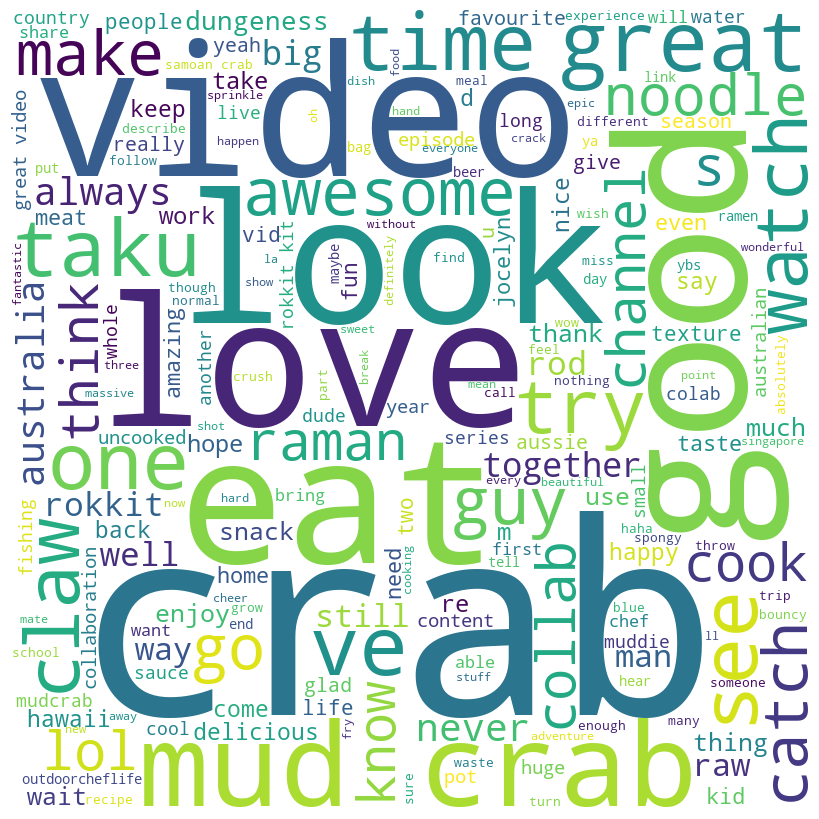

In [46]:
comment_words = ''
stopwords = set(STOPWORDS)


for val in comments_top500df['text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image   
beingsaved = plt.figure(figsize = (8, 8), facecolor = None)

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()



In [47]:
# save high resolution figure
beingsaved.savefig('02_Results/Video_highest_polarityindex_comments_wordcloud.eps', format='eps', dpi=1000)

# 4. Sentiment analysis 
https://www.kaggle.com/code/adepvenugopal/sentiment-analysis-of-youtube-comments

In [48]:
#Testing NLP - Sentiment Analysis using TextBlob
testsent= TextBlob("The movie is good").sentiment

testsent
# To interpret the result:
# TextBlob’s output for a polarity task is a float within the range [-1.0, 1.0] where -1.0 is a negative polarity and 1.0 is positive. This score can also be equal to 0, which stands for a neutral evaluation of a statement as it doesn’t contain any words from the training set.
# Whereas, a subjectivity/objectivity identification task reports a float within the range [0.0, 1.0] where 0.0 is a very objective sentence and 1.0 is very subjective.

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [49]:
#Testing NLP - Sentiment Analysis using one of the video comments
comments_top500df['text'][1]

TextBlob(comments_top500df['text'][1]).sentiment

'I love Collab thank allow we part all tasty journey'

Sentiment(polarity=0.5, subjectivity=0.6)

In [50]:
# Calculating Sentiment polarity for each comment

pol=[] # list which will contain the polarity of the comments
for i in comments_top500df['text']:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)
        
# adding polarity to df
comments_top500df['polarity']=pol
comments_top500df.head()

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed,polarity
0,Ugy2LLSC4MvOa-G8tMV4AaABAg,be lucky get multiple video channel,1 month ago,@McOwenWilson,UCUpx289zCm904N5HkLyvnmA,105,https://yt3.ggpht.com/ytc/AOPolaQvwiPmroQRTAqQ...,True,False,1.689634e+09,0.166667
1,UgxYCkRG9mtYGhBKgE54AaABAg,I love Collab thank allow we part all tasty jo...,1 month ago,@bbk2325,UCCpWizuBPp4x38iW77E-2cA,75,https://yt3.ggpht.com/ySqE9Yd5HQGhYwMmko_-ub-V...,True,False,1.689634e+09,0.500000
2,Ugxn2WLmf53--d4piCl4AaABAg,the colab I ve always want 2 nice good dude Tu...,1 month ago (edited),@robroaring7175,UC1ySaQ7VOXOskQjnzT0xM_w,92,https://yt3.ggpht.com/cFR_WQ1y3FK84XIv7DCV1pYV...,True,False,1.689634e+09,0.602778
3,Ugy4f3Zgwt8Ofpu7yT14AaABAg,experience two channel collaborate simply brin...,1 month ago,@user-kz1ve6zd5y,UCwaPuchHycbyUzdvvRPknpw,26,https://yt3.ggpht.com/lluaWC70VzGkBt3Olt20F2l8...,True,False,1.689634e+09,0.422857
4,Ugx--c4qBowKPV6Hyb54AaABAg,you rokkit kit people I would not hesitate inv...,1 month ago,@spurlock2679,UCubAmk6J2qgdWZeyIHyW8sQ,16,https://yt3.ggpht.com/PjQmPKyTLByPd2dCXPk5_RuF...,False,False,1.689634e+09,0.540000


In [51]:
comments_top500df.tail()
# to make sure that 

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed,polarity
383,UgyZ5H7oeUqth0RSawx4AaABAg,throw away claw insane like purpose crab even ...,1 month ago (edited),@ricardocosson1105,UCtfL-d9heIvYK11DOz8dS6g,0,https://yt3.ggpht.com/ytc/AOPolaRp-raZmICZ65F9...,False,False,1.689634e+09,-0.25
384,Ugx__aol9yJbhKPwVt54AaABAg.9rlidkar9bq9rm2A9JYsmt,experience tell look undersized,1 month ago,@jimmyrecard6021,UCOHoiv5Ad8qaU4ogxR2KENA,1,https://yt3.ggpht.com/i9oFtyA6CLA6h2OwjpTCnTkM...,False,True,1.689634e+09,0.00
385,UgzdqZT7ZEKly6CQsVF4AaABAg.9rlRk7uF8ZR9rlUJi2uc1z,what matter,1 month ago,@jerrybow8779,UCFmJ4gPQHIX5UnLPja5j0jQ,0,https://yt3.ggpht.com/ytc/AOPolaQBiLm_dc8s2pSd...,False,True,1.689634e+09,0.00
386,UgzdqZT7ZEKly6CQsVF4AaABAg.9rlRk7uF8ZR9rlaSSLFRC-,jerrybow8779 honestly,1 month ago,@OutdoorChefLife,UCNqpN335uVY9Sx_ZK_WuOAA,1,https://yt3.ggpht.com/ytc/AOPolaTpPglY5m3_b2Z7...,False,True,1.689634e+09,0.60
387,UgyRiH-rVHvJsoF59dV4AaABAg.9rlxz-Vr1PG9rm24Ft-6wL,good boat,1 month ago,@jimmyrecard6021,UCOHoiv5Ad8qaU4ogxR2KENA,0,https://yt3.ggpht.com/i9oFtyA6CLA6h2OwjpTCnTkM...,False,True,1.689634e+09,0.70


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   2.,   3.,   2.,   0.,   3.,   4.,   2.,
          7.,   1.,   0.,   4.,   3.,   4., 116.,   1.,   3.,   3.,  15.,
          3.,   3.,   2.,   3.,   2.,  11.,   3.,   7.,   7.,   3.,   2.,
          2.,   7.,   6.,  13.,   2.,   6.,   2.,   4.,   2.,  12.,   5.,
          3.,   4.,  12.,   4.,   2.,   4.,   3.,   0.,   7.,   1.,   4.,
          0.,   2.,  24.,   1.,   0.,   0.,   4.,   0.,   2.,   0.,   0.,
         14.]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
        -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
        -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
        -0.28, -0.26, -0.24, -0.22

[Text(0.5, 1.0, 'Comment Polarity Histogram'), Text(0, 0.5, 'Frequency')]

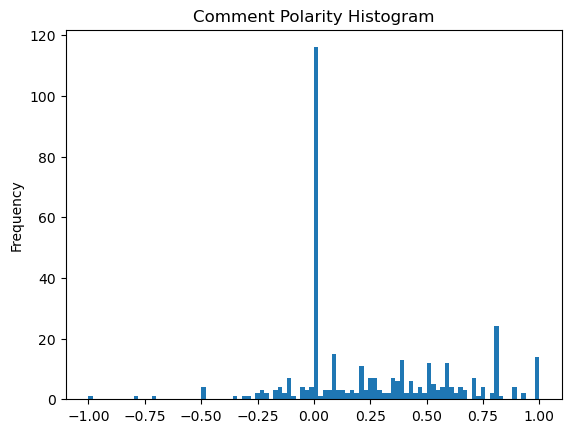

In [52]:
# plotting the polarity 
plt.hist(comments_top500df['polarity'], bins=100)
plt.gca().set(title='Comment Polarity Histogram', ylabel='Frequency')


In [53]:
# get summary statistics 
comments_top500df['polarity'].describe()

count    381.000000
mean       0.256334
std        0.353152
min       -1.000000
25%        0.000000
50%        0.150000
75%        0.525000
max        1.000000
Name: polarity, dtype: float64